In [37]:
import os
import json
import subprocess
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Change these paths to your local setup
eval_path = "/zjunlp/oyx/mle-bench/runs/2025-05-11T02-52-01-GMT_run-group_aide/tensorflow-speech-recognition-challenge_6f2c29d6-70ba-4d88-ab20-ddf4cba34b96"
eval_task = eval_path.split("/")[-1].split("_")[0]
data_dir = "/newdisk1/oyx/mle-bench/data"

In [39]:
baseline = {
    "aptos2019-blindness-detection": 0.8543,
    "tgs-salt-identification-challenge": 0.5007,
    "detecting-insults-in-social-commentary": 0.83321,
    "spooky-author-identification": 0.35512,
    "lmsys-chatbot-arena": 1.03858,
    "us-patent-phrase-to-phrase-matching": 0.8462,
    "stanford-covid-vaccine": 0.31418,
    "champs-scalar-coupling": 1.92074,
    "mlsp-2013-birds": 0.89,
    "ventilator-pressure-prediction": 0.71716,
    "google-quest-challenge": 0.37959,
    "predict-volcanic-eruptions-ingv-oe": 4035079,
}

In [40]:
top = {
    "aptos2019-blindness-detection": 0.936129,
    "tgs-salt-identification-challenge": 0.89646,
    "detecting-insults-in-social-commentary": 0.84248,
    "spooky-author-identification": 0.320,
    "lmsys-chatbot-arena": 0.96898,
    "us-patent-phrase-to-phrase-matching": 0.8782,
    "stanford-covid-vaccine": 0.34198,
    "champs-scalar-coupling": -3.23968,
    "mlsp-2013-birds": 0.95611,
    "ventilator-pressure-prediction": 0.0575,
    "google-quest-challenge": 0.43100,
    "predict-volcanic-eruptions-ingv-oe": 3438191,
}

In [41]:
metric_type = {
    "aptos2019-blindness-detection": "Max",
    "tgs-salt-identification-challenge": "Max",
    "detecting-insults-in-social-commentary": "Max",
    "spooky-author-identification": "Min",
    "lmsys-chatbot-arena": "Min",
    "us-patent-phrase-to-phrase-matching": "Max",
    "stanford-covid-vaccine": "Min",
    "champs-scalar-coupling": "Min",
    "mlsp-2013-birds": "Max",
    "ventilator-pressure-prediction": "Min",
    "google-quest-challenge": "Max",
    "predict-volcanic-eruptions-ingv-oe": "Min",
}

In [42]:
scores = []
beats = []
for timestamp in range(1, 25):
    submission_dir = os.path.join(eval_path, f"save_{timestamp}/submission")
    if os.path.exists(submission_dir):
        submission_path = os.path.join(submission_dir, f"submission.csv")
        shell_script = f"mlebench grade-sample {submission_path} {eval_task} --data-dir {data_dir}"
        result = subprocess.run(shell_script, shell=True, capture_output=True, text=True)
        output = result.stderr
        start = output.find('{')
        end = output.rfind('}') + 1
        json_str = output[start:end]

        try:
            json_data = json.loads(json_str)
            score = json_data.get('score', None)
            beat_ratio = json_data.get('beat_ratio', None)
            if score is not None and beat_ratio is not None:
                print(f"Score and beat ratio for submission {timestamp}: ({score}, {beat_ratio * 100:.2f}%)")
            else:
                print(f"Score or beat ratio not found for submission {timestamp}.")
        except json.JSONDecodeError:
            score = None
            beat_ratio = None
            print(f"Error decoding JSON for submission {timestamp}.")
        scores.append(score)
        beats.append(beat_ratio)
    else:
        print(f"Submission at timestamp {timestamp} does not exist.")


Score or beat ratio not found for submission 1.
Score and beat ratio for submission 2: (0.31794, 20.78%)
Score and beat ratio for submission 3: (0.31794, 20.78%)
Score and beat ratio for submission 4: (0.31794, 20.78%)
Score and beat ratio for submission 5: (0.31794, 20.78%)
Score and beat ratio for submission 6: (0.31794, 20.78%)
Score and beat ratio for submission 7: (0.31794, 20.78%)
Score and beat ratio for submission 8: (0.31794, 20.78%)
Score and beat ratio for submission 9: (0.31794, 20.78%)
Score and beat ratio for submission 10: (0.31794, 20.78%)
Score and beat ratio for submission 11: (0.31794, 20.78%)
Score and beat ratio for submission 12: (0.31794, 20.78%)
Score and beat ratio for submission 13: (0.31794, 20.78%)
Score and beat ratio for submission 14: (0.31794, 20.78%)
Score and beat ratio for submission 15: (0.31794, 20.78%)
Score and beat ratio for submission 16: (0.31794, 20.78%)
Score and beat ratio for submission 17: (0.31794, 20.78%)
Score and beat ratio for submiss

In [43]:
output

'[2025-05-12 15:37:02,025] [cli.py:224] Competition report:\n[2025-05-12 15:37:02,026] [cli.py:225] {\n    "competition_id": "tensorflow-speech-recognition-challenge",\n    "score": 0.31794,\n    "gold_threshold": 0.90485,\n    "silver_threshold": 0.89627,\n    "bronze_threshold": 0.88793,\n    "median_threshold": 0.77722,\n    "any_medal": false,\n    "gold_medal": false,\n    "silver_medal": false,\n    "bronze_medal": false,\n    "above_median": false,\n    "beat_ratio": 0.20776255707762556,\n    "submission_exists": true,\n    "valid_submission": true,\n    "is_lower_better": false,\n    "created_at": "2025-05-12T15:37:02.025682",\n    "submission_path": "/zjunlp/oyx/mle-bench/runs/2025-05-11T02-52-01-GMT_run-group_aide/tensorflow-speech-recognition-challenge_6f2c29d6-70ba-4d88-ab20-ddf4cba34b96/save_24/submission/submission.csv"\n}\n'

In [44]:
np.array(scores)

array([None, 0.31794, 0.31794, 0.31794, 0.31794, 0.31794, 0.31794,
       0.31794, 0.31794, 0.31794, 0.31794, 0.31794, 0.31794, 0.31794,
       0.31794, 0.31794, 0.31794, 0.31794, 0.31794, 0.31794, 0.31794,
       0.31794, 0.31794, 0.31794], dtype=object)

KeyError: 'tensorflow-speech-recognition-challenge'

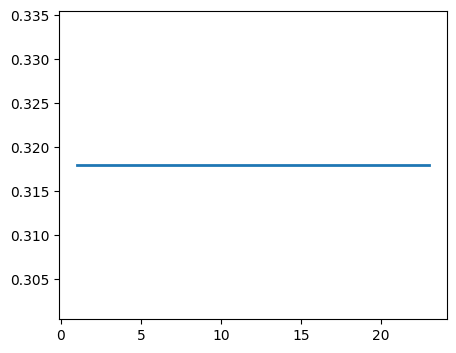

In [45]:
plt.figure(figsize=(5, 4))
plt.plot(np.array(scores), linewidth=2, color='C0', label='mlagent (sbs)')
# plt.axhline(y=baseline[eval_task], color='C3', linestyle='--', linewidth=1, label='AIDE-24h')
plt.axhline(y=top[eval_task], color='C4', linestyle='--', linewidth=1, label='Human Top')

plt.xlabel('Time (h)', fontsize=12)
plt.ylabel(f'Metric ({metric_type[eval_task]})', fontsize=12)

plt.title(eval_task)
plt.xticks(range(0, 25, 4))
plt.legend(loc='best', fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=1, alpha=0.8)

plt.tight_layout()
plt.show()